# Ford gobike Dataset Exploration
## by Muneaki Umino

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [5]:
# Create day and weekday columns
df.start_time = pd.to_datetime(df.start_time)
df['day'] = df.start_time.dt.strftime('%A')

df['weekday'] = df.start_time.dt.weekday.apply(lambda x: 'weekday' if x < 5 else 'weekend')

In [6]:
# Create distance column
from math import radians, cos, sin, asin, sqrt 
def distance(lon1, lat1, lon2, lat2): 
      
    # radians converts from degrees to radians. 
    lon1 = df.start_station_longitude
    lon2 = df.end_station_longitude
    lat1 = df.start_station_latitude
    lat2 = df.end_station_latitude
    
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
  
    c = 2 * np.arcsin(np.sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
       
    distance = r * c
    return np.float64(round(1000*distance))

df['distance'] = distance(df['start_station_longitude'],
                         df['start_station_latitude'],
                         df['end_station_longitude'],
                         df['end_station_latitude'])

In [7]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,day,weekday,distance
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,Sunday,weekend,943.0
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,Sunday,weekend,3070.0
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,Sunday,weekend,0.0
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,Sunday,weekend,1047.0
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,Sunday,weekend,636.0


### What is the structure of your dataset?

There are 519700 observations ofdata
Columns of this dataset are:

1 duration_sec           Numeric
start_time               *Cross-sectional (Combination of start_time and end_time represent one numeric variable)*
end_time                 *Cross-sectional*
start_station_id         Categorical
start_station_name       Categorical
start_station_latitude   *Cross-sectional (Combination of start_station_latitude and end_station_latitude represent one numeric variable)*
start_station_longitude  *Cross-sectional (Combination of start_station_longitude and end_station_longitude represent one numeric variable)*
end_station_id           Categorical  
end_station_name         Categorical 
end_station_latitude     *Cross-sectional (Combination of start_station_latitude and end_station_latitude represent one numeric variable)*
end_station_longitude    *Cross-sectional (Combination of start_station_longitude and end_station_longitude represent one numeric variable)*
bike_id                  Categorical  
user_type                Categorical 
day                      Categorical
weelend                  Categorical
distance                 Numeric


### What is/are the main feature(s) of interest in your dataset?

Main future od this dataset is how long, and how much distance customers travel on each bike trip.
I am also interested to see if there is any difference between user types, day of the week, weekdays or weekends.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect `duration_sec`, `user_type`, and `day`, `weekend`, `distance` columns bring interesting insight of the dataset.

## Univariate Exploration

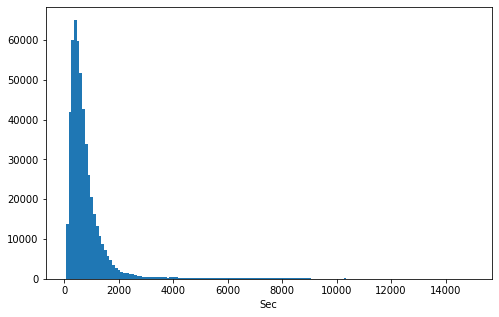

In [8]:
# Let's see how long customers use Gobike
binsize = 25
bins = np.arange(61, 15000, 100)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Sec')
plt.show()

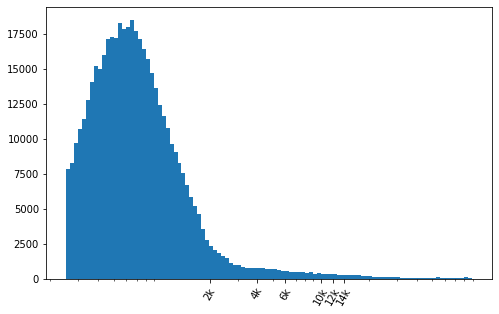

In [9]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([2000, 4000, 6000, 10000, 12000, 14000], ['2k', '4k', '6k', '10k', '12k', '14k'])

plt.xticks(rotation = 60)
plt.show()

It looks like most Gobikers use service for a short time, probably around 1000 seconds.

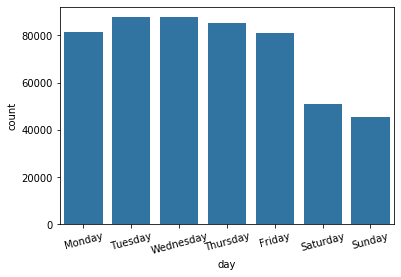

In [10]:
# Is there any difference between days?
level_order = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
category_order = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df['day'] = df['day'].astype(category_order)

base_color = sb.color_palette()[0]
plt.xticks(rotation = 15)
sb.countplot(data = df, x = 'day', color = base_color);

There is a big difference, I can clearly see there are more Gobikers on weekdays. that means they probably use Gobike for commute to work on weekdays than sightseeing on weekends.

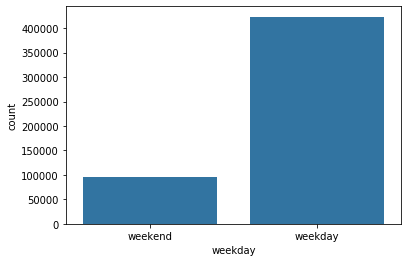

In [11]:
base_color = sb.color_palette()[0]
sb.countplot(data = df , x = 'weekday', color = base_color);

Seeing weekday users and weekend users show much obvious difference.

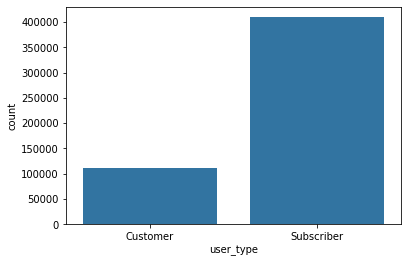

In [12]:
base_color = sb.color_palette()[0]
sb.countplot(data = df , x = 'user_type', color = base_color);

There are more Subscribers. That means there are more people use Gobike regularly.\
Probbaly those subscribers are commuters.\
This gragh is almost identical to the weekend users and weekday users graph.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The `duration_sec` column had a large gap between maximum value and minimum value, so I used log scale in order to see informations clearly.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There are clear difference between weekdays users and weekend users, also customers(one-time users) and subscribers.
I made `day` column to see which day of the week based on customer's start time. By plotting this column, I was able to see a clear difference between weekend users and weekday users.

## Bivariate Exploration

In [13]:
numeric_vars = ['duration_sec']
categoric_vars = ['day', 'weekend', 'use_type']

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!